In [ ]:
import pyspark

In [ ]:
from pyspark.context import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('pyspark').getOrCreate()

In [ ]:
accidents = spark.read.csv('C:/Users/HP/Downloads/accidentsuk/Accidents0514.csv',header=True)
casualities = spark.read.csv('C:/Users/HP/Downloads/accidentsuk/Casualties0514.csv',header=True)
vehicles = spark.read.csv('C:/Users/HP/Downloads/accidentsuk/Vehicles0514.csv',header=True)

In [ ]:
accidents.printSchema()

root
 |-- Accident_Index: string (nullable = true)
 |-- Location_Easting_OSGR: string (nullable = true)
 |-- Location_Northing_OSGR: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Police_Force: string (nullable = true)
 |-- Accident_Severity: string (nullable = true)
 |-- Number_of_Vehicles: string (nullable = true)
 |-- Number_of_Casualties: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Day_of_Week: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Local_Authority_(District): string (nullable = true)
 |-- Local_Authority_(Highway): string (nullable = true)
 |-- 1st_Road_Class: string (nullable = true)
 |-- 1st_Road_Number: string (nullable = true)
 |-- Road_Type: string (nullable = true)
 |-- Speed_limit: string (nullable = true)
 |-- Junction_Detail: string (nullable = true)
 |-- Junction_Control: string (nullable = true)
 |-- 2nd_Road_Class: string (nullable = true)
 |-- 2nd_Road_Numb

In [ ]:
accidents= accidents.drop('LSOA_of_Accident_Location')

In [ ]:
#Dropping - 'Location_Easting_OSGR','Location_Northing_OSGR', 'Longitude', 'Latitude','Time'
accidents = accidents.drop('Location_Easting_OSGR','Location_Northing_OSGR', 'Longitude', 'Latitude','Time')
#accidents.printSchema()

In [ ]:
casualities.printSchema()

root
 |-- Accident_Index: string (nullable = true)
 |-- Vehicle_Reference: string (nullable = true)
 |-- Casualty_Reference: string (nullable = true)
 |-- Casualty_Class: string (nullable = true)
 |-- Sex_of_Casualty: string (nullable = true)
 |-- Age_of_Casualty: string (nullable = true)
 |-- Age_Band_of_Casualty: string (nullable = true)
 |-- Casualty_Severity: string (nullable = true)
 |-- Pedestrian_Location: string (nullable = true)
 |-- Pedestrian_Movement: string (nullable = true)
 |-- Car_Passenger: string (nullable = true)
 |-- Bus_or_Coach_Passenger: string (nullable = true)
 |-- Pedestrian_Road_Maintenance_Worker: string (nullable = true)
 |-- Casualty_Type: string (nullable = true)
 |-- Casualty_Home_Area_Type: string (nullable = true)



In [ ]:
vehicles.printSchema()

root
 |-- Accident_Index: string (nullable = true)
 |-- Vehicle_Reference: string (nullable = true)
 |-- Vehicle_Type: string (nullable = true)
 |-- Towing_and_Articulation: string (nullable = true)
 |-- Vehicle_Manoeuvre: string (nullable = true)
 |-- Vehicle_Location-Restricted_Lane: string (nullable = true)
 |-- Junction_Location: string (nullable = true)
 |-- Skidding_and_Overturning: string (nullable = true)
 |-- Hit_Object_in_Carriageway: string (nullable = true)
 |-- Vehicle_Leaving_Carriageway: string (nullable = true)
 |-- Hit_Object_off_Carriageway: string (nullable = true)
 |-- 1st_Point_of_Impact: string (nullable = true)
 |-- Was_Vehicle_Left_Hand_Drive?: string (nullable = true)
 |-- Journey_Purpose_of_Driver: string (nullable = true)
 |-- Sex_of_Driver: string (nullable = true)
 |-- Age_of_Driver: string (nullable = true)
 |-- Age_Band_of_Driver: string (nullable = true)
 |-- Engine_Capacity_(CC): string (nullable = true)
 |-- Propulsion_Code: string (nullable = true)
 |

In [ ]:
casualities = casualities.withColumnRenamed("Accident_Index","Accident_Index_Casualties")
#casualities.show(5)

In [ ]:
vehicles = vehicles.withColumnRenamed("Accident_Index","Accident_Index_Vehicles")
#vehicles.show(5)

In [ ]:
vehicles = vehicles.withColumnRenamed("Vehicle_Reference","Veh_Ref")
#vehicles.show(5)

In [ ]:
accidents = accidents.join(casualities,accidents.Accident_Index ==  casualities.Accident_Index_Casualties)

In [ ]:
#accidents.show(5)

In [ ]:
accidents = accidents.join(vehicles,accidents.Accident_Index ==  vehicles.Accident_Index_Vehicles)

In [ ]:
#accidents.show(5)

In [ ]:
accidents.printSchema()

root
 |-- Accident_Index: string (nullable = true)
 |-- Police_Force: string (nullable = true)
 |-- Accident_Severity: string (nullable = true)
 |-- Number_of_Vehicles: string (nullable = true)
 |-- Number_of_Casualties: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Day_of_Week: string (nullable = true)
 |-- Local_Authority_(District): string (nullable = true)
 |-- Local_Authority_(Highway): string (nullable = true)
 |-- 1st_Road_Class: string (nullable = true)
 |-- 1st_Road_Number: string (nullable = true)
 |-- Road_Type: string (nullable = true)
 |-- Speed_limit: string (nullable = true)
 |-- Junction_Detail: string (nullable = true)
 |-- Junction_Control: string (nullable = true)
 |-- 2nd_Road_Class: string (nullable = true)
 |-- 2nd_Road_Number: string (nullable = true)
 |-- Pedestrian_Crossing-Human_Control: string (nullable = true)
 |-- Pedestrian_Crossing-Physical_Facilities: string (nullable = true)
 |-- Light_Conditions: string (nullable = true)
 |-- Weathe

In [ ]:
accidents = accidents.drop("Accident_Index_Casualties","Accident_Index_Vehicles","Veh_Ref")

In [ ]:
#accidents.printSchema()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType,DateType
accidents = accidents.withColumn("Police_Force",col("Police_Force").cast(IntegerType()))
accidents = accidents.withColumn("Accident_Severity",col("Accident_Severity").cast(IntegerType()))
accidents = accidents.withColumn("Number_of_Vehicles",col("Number_of_Vehicles").cast(IntegerType()))
accidents = accidents.withColumn("Number_of_Casualties",col("Number_of_Casualties").cast(IntegerType()))
accidents = accidents.withColumn("Day_of_Week",col("Day_of_Week").cast(IntegerType()))
accidents = accidents.withColumn("Local_Authority_(District)",col("Local_Authority_(District)").cast(IntegerType()))
accidents = accidents.withColumn("1st_Road_Class",col("1st_Road_Class").cast(IntegerType()))
accidents = accidents.withColumn("1st_Road_Number",col("1st_Road_Number").cast(IntegerType()))
accidents = accidents.withColumn("Road_Type",col("Road_Type").cast(IntegerType()))
accidents = accidents.withColumn("Speed_limit",col("Speed_limit").cast(IntegerType()))
accidents = accidents.withColumn("Junction_Detail",col("Junction_Detail").cast(IntegerType()))
accidents = accidents.withColumn("Junction_Control",col("Junction_Control").cast(IntegerType()))
accidents = accidents.withColumn("2nd_Road_Class",col("2nd_Road_Class").cast(IntegerType()))
accidents = accidents.withColumn("2nd_Road_Number",col("2nd_Road_Number").cast(IntegerType()))
accidents = accidents.withColumn("Pedestrian_Crossing-Human_Control",col("Pedestrian_Crossing-Human_Control").cast(IntegerType()))
accidents = accidents.withColumn("Pedestrian_Crossing-Physical_Facilities",col("Pedestrian_Crossing-Physical_Facilities").cast(IntegerType()))
accidents = accidents.withColumn("Light_Conditions",col("Light_Conditions").cast(IntegerType()))
accidents = accidents.withColumn("Weather_Conditions",col("Weather_Conditions").cast(IntegerType()))
accidents = accidents.withColumn("Road_Surface_Conditions",col("Road_Surface_Conditions").cast(IntegerType()))
accidents = accidents.withColumn("Special_Conditions_at_Site",col("Special_Conditions_at_Site").cast(IntegerType()))
accidents = accidents.withColumn("Carriageway_Hazards",col("Carriageway_Hazards").cast(IntegerType()))
accidents = accidents.withColumn("Urban_or_Rural_Area",col("Urban_or_Rural_Area").cast(IntegerType()))
accidents = accidents.withColumn("Did_Police_Officer_Attend_Scene_of_Accident",col("Did_Police_Officer_Attend_Scene_of_Accident").cast(IntegerType()))
accidents = accidents.withColumn("Vehicle_Reference",col("Vehicle_Reference").cast(IntegerType()))
accidents = accidents.withColumn("Casualty_Reference",col("Casualty_Reference").cast(IntegerType()))
accidents = accidents.withColumn("Casualty_Class",col("Casualty_Class").cast(IntegerType()))
accidents = accidents.withColumn("Sex_of_Casualty",col("Sex_of_Casualty").cast(IntegerType()))
accidents = accidents.withColumn("Age_of_Casualty",col("Age_of_Casualty").cast(IntegerType()))
accidents = accidents.withColumn("Age_Band_of_Casualty",col("Age_Band_of_Casualty").cast(IntegerType()))
accidents = accidents.withColumn("Casualty_Severity",col("Casualty_Severity").cast(IntegerType()))
accidents = accidents.withColumn("Pedestrian_Location",col("Pedestrian_Location").cast(IntegerType()))
accidents = accidents.withColumn("Pedestrian_Movement",col("Pedestrian_Movement").cast(IntegerType()))
accidents = accidents.withColumn("Car_Passenger",col("Car_Passenger").cast(IntegerType()))
accidents = accidents.withColumn("Bus_or_Coach_Passenger",col("Bus_or_Coach_Passenger").cast(IntegerType()))
accidents = accidents.withColumn("Pedestrian_Road_Maintenance_Worker",col("Pedestrian_Road_Maintenance_Worker").cast(IntegerType()))
accidents = accidents.withColumn("Casualty_Type",col("Casualty_Type").cast(IntegerType()))
accidents = accidents.withColumn("Casualty_Home_Area_Type",col("Casualty_Home_Area_Type").cast(IntegerType()))
accidents = accidents.withColumn("Vehicle_Type",col("Vehicle_Type").cast(IntegerType()))
accidents = accidents.withColumn("Towing_and_Articulation",col("Towing_and_Articulation").cast(IntegerType()))
accidents = accidents.withColumn("Vehicle_Manoeuvre",col("Vehicle_Manoeuvre").cast(IntegerType()))
accidents = accidents.withColumn("Vehicle_Location-Restricted_Lane",col("Vehicle_Location-Restricted_Lane").cast(IntegerType()))
accidents = accidents.withColumn("Junction_Location",col("Junction_Location").cast(IntegerType()))
accidents = accidents.withColumn("Skidding_and_Overturning",col("Skidding_and_Overturning").cast(IntegerType()))
accidents = accidents.withColumn("Hit_Object_in_Carriageway",col("Hit_Object_in_Carriageway").cast(IntegerType()))
accidents = accidents.withColumn("Vehicle_Leaving_Carriageway",col("Vehicle_Leaving_Carriageway").cast(IntegerType()))
accidents = accidents.withColumn("Hit_Object_off_Carriageway",col("Hit_Object_off_Carriageway").cast(IntegerType()))
accidents = accidents.withColumn("1st_Point_of_Impact",col("1st_Point_of_Impact").cast(IntegerType()))
accidents = accidents.withColumn("Was_Vehicle_Left_Hand_Drive?",col("Was_Vehicle_Left_Hand_Drive?").cast(IntegerType()))
accidents = accidents.withColumn("Journey_Purpose_of_Driver",col("Journey_Purpose_of_Driver").cast(IntegerType()))
accidents = accidents.withColumn("Sex_of_Driver",col("Sex_of_Driver").cast(IntegerType()))
accidents = accidents.withColumn("Age_of_Driver",col("Age_of_Driver").cast(IntegerType()))
accidents = accidents.withColumn("Age_Band_of_Driver",col("Age_Band_of_Driver").cast(IntegerType()))
accidents = accidents.withColumn("Engine_Capacity_(CC)",col("Engine_Capacity_(CC)").cast(IntegerType()))
accidents = accidents.withColumn("Propulsion_Code",col("Propulsion_Code").cast(IntegerType()))
accidents = accidents.withColumn("Age_of_Vehicle",col("Age_of_Vehicle").cast(IntegerType()))
accidents = accidents.withColumn("Driver_IMD_Decile",col("Driver_IMD_Decile").cast(IntegerType()))
accidents = accidents.withColumn("Driver_Home_Area_Type",col("Driver_Home_Area_Type").cast(IntegerType()))
accidents = accidents.withColumn("Date",col("Date").cast(DateType()))


In [ ]:
accidents.printSchema()

root
 |-- Accident_Index: string (nullable = true)
 |-- Police_Force: integer (nullable = true)
 |-- Accident_Severity: integer (nullable = true)
 |-- Number_of_Vehicles: integer (nullable = true)
 |-- Number_of_Casualties: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- Day_of_Week: integer (nullable = true)
 |-- Local_Authority_(District): integer (nullable = true)
 |-- Local_Authority_(Highway): string (nullable = true)
 |-- 1st_Road_Class: integer (nullable = true)
 |-- 1st_Road_Number: integer (nullable = true)
 |-- Road_Type: integer (nullable = true)
 |-- Speed_limit: integer (nullable = true)
 |-- Junction_Detail: integer (nullable = true)
 |-- Junction_Control: integer (nullable = true)
 |-- 2nd_Road_Class: integer (nullable = true)
 |-- 2nd_Road_Number: integer (nullable = true)
 |-- Pedestrian_Crossing-Human_Control: integer (nullable = true)
 |-- Pedestrian_Crossing-Physical_Facilities: integer (nullable = true)
 |-- Light_Conditions: integer (nullable = tr

In [ ]:
accidents.select('Date').show()

+----+
|Date|
+----+
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
|null|
+----+
only showing top 20 rows



In [ ]:
accidents = accidents.drop('Date')

In [ ]:
#accidents.printSchema()

In [ ]:
from pyspark.sql.functions import col,isnan,when,count
accidents.select([count(when(isnan(c)|col(c).isNull(),c)).alias(c) for c in accidents.columns]).show()

+--------------+------------+-----------------+------------------+--------------------+-----------+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-----------------+------------------+--------------+---------------+---------------+--------------------+-----------------+-------------------+-------------------+-------------+----------------------+----------------------------------+-------------+-----------------------+------------+-----------------------+-----------------+--------------------------------+-----------------+------------------------+-------------------------+---------------------------+--------------------------+-

In [ ]:
from pyspark.sql.functions import countDistinct
distinct_count = accidents.select(countDistinct("Casualty_Severity"))
distinct_count.show()

print("Distinct Count of Casuality_Severity: "+ str(distinct_count.collect()[0][0]))

+---------------------------------+
|count(DISTINCT Casualty_Severity)|
+---------------------------------+
|                                3|
+---------------------------------+

Distinct Count of Casuality_Severity: 3


In [ ]:
accidents.distinct().show()

+--------------+------------+-----------------+------------------+--------------------+-----------+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-----------------+------------------+--------------+---------------+---------------+--------------------+-----------------+-------------------+-------------------+-------------+----------------------+----------------------------------+-------------+-----------------------+------------+-----------------------+-----------------+--------------------------------+-----------------+------------------------+-------------------------+---------------------------+--------------------------+-

In [ ]:
accidents.select('*').count()

4287593

In [ ]:
accidents.distinct().count()

4285577

In [ ]:
accidents.count()

4287593

In [ ]:
accidents = accidents.distinct()

In [ ]:
accidents.count()

4285577

In [ ]:
#accidents.show(5)

In [ ]:
#accidents.head(5)

In [ ]:
accidents = accidents.limit(50000)

In [ ]:
#accidents.count()

In [ ]:
accident_pd = accidents.toPandas()

In [ ]:
#accident_pd.count()

In [ ]:
accident_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Accident_Index                               50000 non-null  object
 1   Police_Force                                 50000 non-null  int32 
 2   Accident_Severity                            50000 non-null  int32 
 3   Number_of_Vehicles                           50000 non-null  int32 
 4   Number_of_Casualties                         50000 non-null  int32 
 5   Day_of_Week                                  50000 non-null  int32 
 6   Local_Authority_(District)                   50000 non-null  int32 
 7   Local_Authority_(Highway)                    50000 non-null  object
 8   1st_Road_Class                               50000 non-null  int32 
 9   1st_Road_Number                              50000 non-null  int32 
 10  Road_Type 

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
accident_pd.to_excel('C:/Users/HP/Documents/AccidentsUKDataset.xlsx', index= False)

In [ ]:
#q1 : Does age of driver have effect on Severity of Accidents and Casualty?
q1_df=  pd.DataFrame(data=accident_pd, columns=['Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver','Age_Band_of_Driver','Driver_Home_Area_Type'])

In [ ]:
q1_df=q1_df[q1_df.Sex_of_Driver !=-1]
q1_df.head()

,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type
0,15,1,29,6,1
1,15,1,51,8,2
2,15,1,45,7,1
3,15,1,27,6,1
4,15,1,-1,-1,1


In [ ]:
map_df={1:'Journey as part of work',2:'Commuting to/from work',3:'Taking pupil to/from school',4:'Pupil riding to/from school',5:'Other',6:'Not known',15:'Not known/Other'}
map_df_age={1:'0 - 5',2:'6 - 10',3:'11 - 15',4:'16 - 20',5:'21 - 25',6:'26 - 35',7:'36 - 45',8:'46 - 55',9:'56 - 65',10:'66 - 75',11:'Over 75'}
map_df_area={1:'Urban Area',2:'Small Town',3:'Rural'}
q1_df.Age_Band_of_Driver=q1_df.Age_Band_of_Driver.map(map_df_age)
q1_df.Journey_Purpose_of_Driver=q1_df.Journey_Purpose_of_Driver.map(map_df)
q1_df.Driver_Home_Area_Type=q1_df.Driver_Home_Area_Type.map(map_df_area)
q1_df.head()

,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type
0,Not known/Other,1,29,26 - 35,Urban Area
1,Not known/Other,1,51,46 - 55,Small Town
2,Not known/Other,1,45,36 - 45,Urban Area
3,Not known/Other,1,27,26 - 35,Urban Area
4,Not known/Other,1,-1,NaN,Urban Area


<AxesSubplot:>

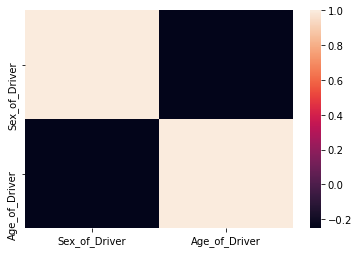

In [ ]:
sns.heatmap(q1_df.corr())

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Journey Purpose of Driver vs Age_of_Driver')

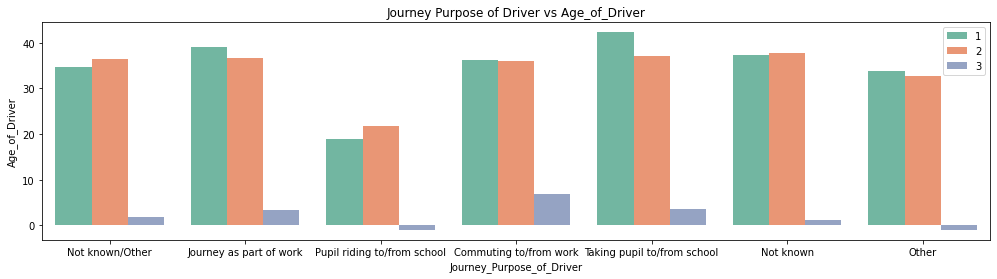

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,4))
sns.barplot('Journey_Purpose_of_Driver','Age_of_Driver',hue='Sex_of_Driver',data=q1_df,ci=None, palette='Set2')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Journey Purpose of Driver vs Age_of_Driver')

In [ ]:
q1a = pd.DataFrame(data=accident_pd, columns=['Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver','Age_Band_of_Driver','Driver_Home_Area_Type','Casualty_Severity','Accident_Severity'])
q1a = q1a[q1a.Sex_of_Driver !=-1]
mapq1a_df={1:'Journey as part of work',2:'Commuting to/from work',3:'Taking pupil to/from school',4:'Pupil riding to/from school',5:'Other',6:'Not known',15:'Not known/Other'}
mapq1a_df_age={1:'0 - 5',2:'6 - 10',3:'11 - 15',4:'16 - 20',5:'21 - 25',6:'26 - 35',7:'36 - 45',8:'46 - 55',9:'56 - 65',10:'66 - 75',11:'Over 75'}
mapq1a_df_area={1:'Urban Area',2:'Small Town',3:'Rural'}
q1a.Age_Band_of_Driver=q1a.Age_Band_of_Driver.map(map_df_age)
q1a.Journey_Purpose_of_Driver=q1a.Journey_Purpose_of_Driver.map(map_df)
q1a.Driver_Home_Area_Type=q1a.Driver_Home_Area_Type.map(map_df_area)
q1a.head()

,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type,Casualty_Severity,Accident_Severity
0,Not known/Other,1,29,26 - 35,Urban Area,3,3
1,Not known/Other,1,51,46 - 55,Small Town,3,3
2,Not known/Other,1,45,36 - 45,Urban Area,3,3
3,Not known/Other,1,27,26 - 35,Urban Area,3,3
4,Not known/Other,1,-1,NaN,Urban Area,3,3


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Accident_Severity vs Age_of_Driver')

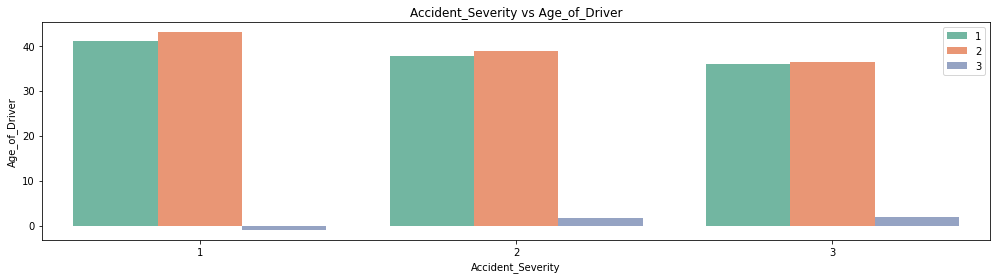

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,4))
sns.barplot('Accident_Severity','Age_of_Driver',hue='Sex_of_Driver',data=q1a,ci=None, palette='Set2')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Accident_Severity vs Age_of_Driver')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Casualty_Severity vs Age_of_Driver')

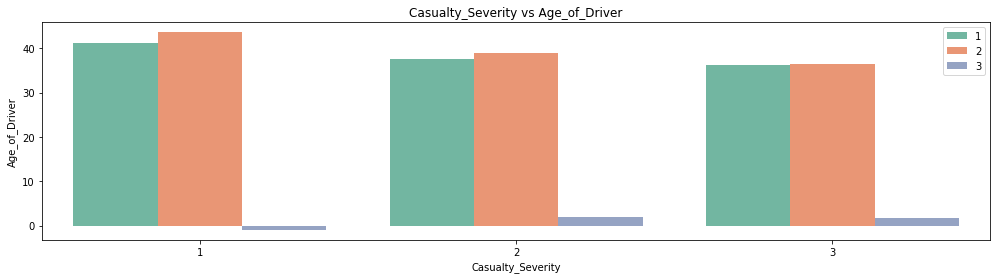

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,4))
sns.barplot('Casualty_Severity','Age_of_Driver',hue='Sex_of_Driver',data=q1a,ci=None, palette='Set2')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Casualty_Severity vs Age_of_Driver')

<AxesSubplot:>

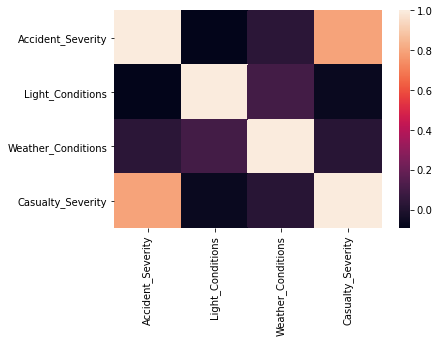

In [ ]:
#q2 : How the weather impact the number or severity of an accident?
q2_df=pd.DataFrame(data=accident_pd,columns=['Accident_Severity','Light_Conditions','Weather_Conditions','Casualty_Severity'])
q2_df=q2_df[q2_df.Weather_Conditions!=-1]
sns.heatmap(q2_df.corr())

<AxesSubplot:xlabel='Accident_Severity', ylabel='count'>

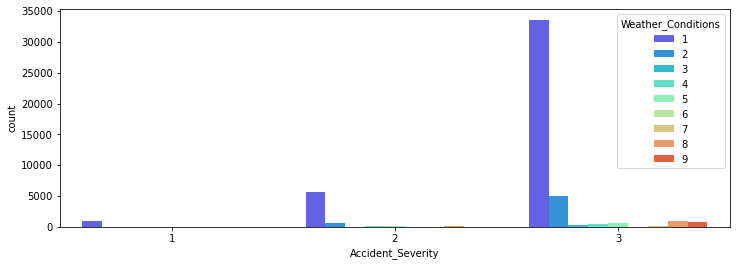

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='Accident_Severity',data=q2_df,hue='Weather_Conditions',palette='rainbow')

<AxesSubplot:xlabel='Casualty_Severity', ylabel='count'>

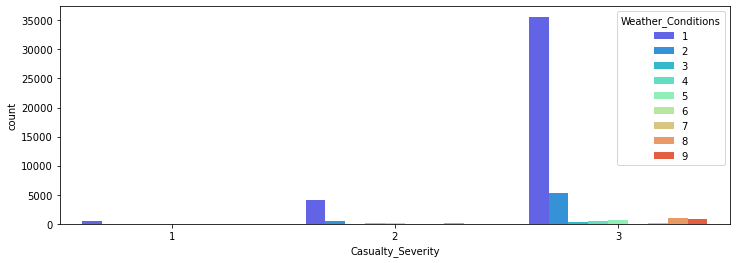

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='Casualty_Severity',data=q2_df,hue='Weather_Conditions',palette='rainbow')

In [ ]:
#q3 : Are certain car models safer than others?
q3_df=pd.DataFrame(data=accident_pd,columns=['Vehicle_Type','Age_of_Vehicle','Was_Vehicle_Left_Hand_Drive?'
                                    ,'Propulsion_Code','Engine_Capacity_(CC)'])
q3_df=q3_df[q3_df.Vehicle_Type!=-1]
q3_df.head()

,Vehicle_Type,Age_of_Vehicle,Was_Vehicle_Left_Hand_Drive?,Propulsion_Code,Engine_Capacity_(CC)
0,19,8,1,2,1896
1,19,7,1,2,2299
2,9,-1,1,1,1999
3,5,-1,1,1,645
4,9,3,1,1,1598


In [ ]:
q3_df=q3_df[q3_df.Age_of_Vehicle!=-1]
q3_df=q3_df[q3_df.Propulsion_Code!=-1]
q3_df=q3_df[q3_df['Engine_Capacity_(CC)']!=-1]

In [ ]:
map_vehicle_type={1:'Pedal cycle',
2:'Motorcycle 50cc and under',
3:'Motorcycle 125cc and under',
4:'Motorcycle over 125cc and up to 500cc',
5:'Motorcycle over 500cc',
8:'Taxi/Private hire car',
9:'Car',
10:'Minibus (8 - 16 passenger seats)',
11:'Bus or coach (17 or more pass seats)',
16:'Ridden horse',
17:'Agricultural vehicle',
18:'Tram',
19:'Van / Goods 3.5 tonnes mgw or under',
20:'Goods over 3.5t. and under 7.5t',
21:'Goods 7.5 tonnes mgw and over',
22:'Mobility scooter',
23:'Electric motorcycle',
90:'Other vehicle',
97:'Motorcycle - unknown cc',
98:'Goods vehicle - unknown weight'
}
q3_df['Vehicle_Type']=q3_df.Vehicle_Type.map(map_vehicle_type)

In [ ]:
map_prop={1:'Petrol',
2:'Heavy oil',
3:'Electric',
4:'Steam',
5:'Gas',
6:'Petrol/Gas (LPG)',
7:'Gas/Bi-fuel',
8:'Hybrid electric',
9:'Gas Diesel',
10:'New fuel technology',
11:'Fuel cells',
12:'Electric diesel'
}
q3_df['Propulsion_Code']=q3_df.Propulsion_Code.map(map_prop)

In [ ]:
q3_df=q3_df[q3_df['Was_Vehicle_Left_Hand_Drive?']!=-1]
q3_df.head()

,Vehicle_Type,Age_of_Vehicle,Was_Vehicle_Left_Hand_Drive?,Propulsion_Code,Engine_Capacity_(CC)
0,Van / Goods 3.5 tonnes mgw or under,8,1,Heavy oil,1896
1,Van / Goods 3.5 tonnes mgw or under,7,1,Heavy oil,2299
4,Car,3,1,Petrol,1598
5,Car,6,1,Petrol,2946
7,Car,3,1,Heavy oil,1896


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Van / Goods 3.5 tonnes mgw or under'),
  Text(1, 0, 'Car'),
  Text(2, 0, 'Motorcycle over 125cc and up to 500cc'),
  Text(3, 0, 'Taxi/Private hire car'),
  Text(4, 0, 'Motorcycle over 500cc'),
  Text(5, 0, 'Motorcycle 125cc and under'),
  Text(6, 0, 'Bus or coach (17 or more pass seats)'),
  Text(7, 0, 'Motorcycle 50cc and under'),
  Text(8, 0, 'Goods 7.5 tonnes mgw and over'),
  Text(9, 0, 'Minibus (8 - 16 passenger seats)'),
  Text(10, 0, 'Other vehicle'),
  Text(11, 0, 'Goods over 3.5t. and under 7.5t'),
  Text(12, 0, 'Agricultural vehicle'),
  Text(13, 0, 'Motorcycle - unknown cc')])

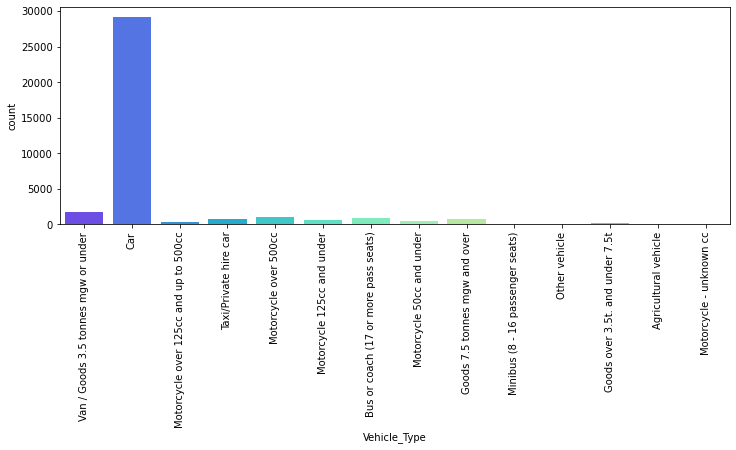

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot('Vehicle_Type',data=q3_df, palette='rainbow')
plt.xticks(rotation=90)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Van / Goods 3.5 tonnes mgw or under'),
  Text(1, 0, 'Car'),
  Text(2, 0, 'Motorcycle over 125cc and up to 500cc'),
  Text(3, 0, 'Taxi/Private hire car'),
  Text(4, 0, 'Motorcycle over 500cc'),
  Text(5, 0, 'Motorcycle 125cc and under'),
  Text(6, 0, 'Bus or coach (17 or more pass seats)'),
  Text(7, 0, 'Motorcycle 50cc and under'),
  Text(8, 0, 'Goods 7.5 tonnes mgw and over'),
  Text(9, 0, 'Minibus (8 - 16 passenger seats)'),
  Text(10, 0, 'Other vehicle'),
  Text(11, 0, 'Goods over 3.5t. and under 7.5t'),
  Text(12, 0, 'Agricultural vehicle'),
  Text(13, 0, 'Motorcycle - unknown cc')])

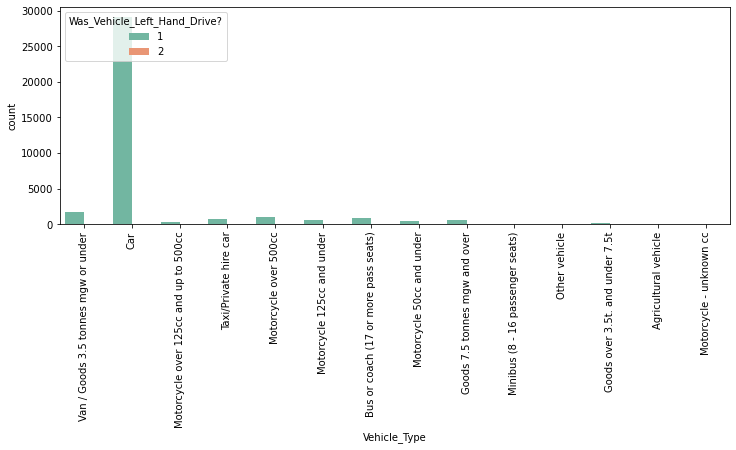

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot('Vehicle_Type',data=q3_df, hue='Was_Vehicle_Left_Hand_Drive?', palette='Set2')
plt.xticks(rotation=90)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


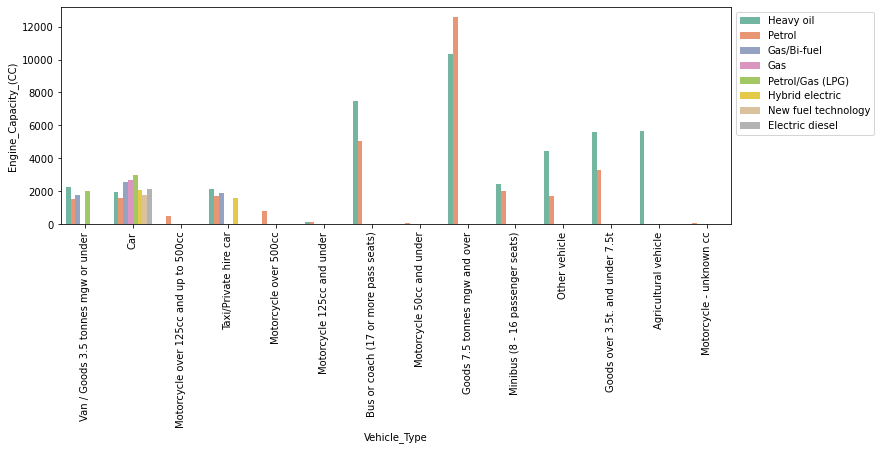

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot('Vehicle_Type','Engine_Capacity_(CC)',data=q3_df, hue='Propulsion_Code', palette='Set2',ci=None)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))

In [ ]:
#machine learning

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['Police_Force','Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Local_Authority_(District)','1st_Road_Class','1st_Road_Number','Road_Type','Speed_limit','Junction_Detail','Junction_Control','2nd_Road_Class','2nd_Road_Number','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Special_Conditions_at_Site','Carriageway_Hazards','Urban_or_Rural_Area','Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Reference','Casualty_Reference','Casualty_Class','Sex_of_Casualty','Age_of_Casualty','Age_Band_of_Casualty','Pedestrian_Location','Pedestrian_Movement','Car_Passenger','Bus_or_Coach_Passenger','Pedestrian_Road_Maintenance_Worker','Casualty_Type','Casualty_Home_Area_Type', 'Vehicle_Type','Towing_and_Articulation','Vehicle_Manoeuvre','Vehicle_Location-Restricted_Lane','Junction_Location','Skidding_and_Overturning','Hit_Object_in_Carriageway','Vehicle_Leaving_Carriageway','Hit_Object_off_Carriageway','1st_Point_of_Impact','Was_Vehicle_Left_Hand_Drive?','Journey_Purpose_of_Driver','Sex_of_Driver','Age_of_Driver','Age_Band_of_Driver','Engine_Capacity_(CC)','Propulsion_Code','Age_of_Vehicle','Driver_IMD_Decile','Driver_Home_Area_Type'], outputCol='features')
accidents = assembler.setHandleInvalid("skip").transform(accidents)

In [ ]:
VectorAssembler(inputCols=['Police_Force','Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Local_Authority_(District)','1st_Road_Class','1st_Road_Number','Road_Type','Speed_limit','Junction_Detail','Junction_Control','2nd_Road_Class','2nd_Road_Number','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Special_Conditions_at_Site','Carriageway_Hazards','Urban_or_Rural_Area','Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Reference','Casualty_Reference','Casualty_Class','Sex_of_Casualty','Age_of_Casualty','Age_Band_of_Casualty','Pedestrian_Location','Pedestrian_Movement','Car_Passenger','Bus_or_Coach_Passenger','Pedestrian_Road_Maintenance_Worker','Casualty_Type','Casualty_Home_Area_Type', 'Vehicle_Type','Towing_and_Articulation','Vehicle_Manoeuvre','Vehicle_Location-Restricted_Lane','Junction_Location','Skidding_and_Overturning','Hit_Object_in_Carriageway','Vehicle_Leaving_Carriageway','Hit_Object_off_Carriageway','1st_Point_of_Impact','Was_Vehicle_Left_Hand_Drive?','Journey_Purpose_of_Driver','Sex_of_Driver','Age_of_Driver','Age_Band_of_Driver','Engine_Capacity_(CC)','Propulsion_Code','Age_of_Vehicle','Driver_IMD_Decile','Driver_Home_Area_Type'], outputCol='features')

VectorAssembler_ef742c4bbff1

In [ ]:
# data splitting
training,testing = accidents.randomSplit([0.7,0.3])

In [ ]:
training.show(5)

+--------------+------------+-----------------+------------------+--------------------+-----------+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-----------------+------------------+--------------+---------------+---------------+--------------------+-----------------+-------------------+-------------------+-------------+----------------------+----------------------------------+-------------+-----------------------+------------+-----------------------+-----------------+--------------------------------+-----------------+------------------------+-------------------------+---------------------------+--------------------------+-

In [ ]:
testing.count()

15055

In [ ]:
training.count()

34945

In [ ]:
accidents = accidents.select(['features','Casualty_Severity'])

In [ ]:
Lr = LogisticRegression(maxIter=10, labelCol='Casualty_Severity')

In [ ]:
LR = Lr.fit(accidents)

In [ ]:
trainSummary = LR.summary
trainSummary

In [ ]:
from pyspark.sql.functions import abs
predictions = LR.transform(testing)

In [ ]:
from pyspark.sql.types import *
predictions = predictions.withColumn("Casualty_Severity", predictions["Casualty_Severity"].cast(DoubleType()))
predictions.select('prediction','Casualty_Severity').show(5)

+----------+-----------------+
|prediction|Casualty_Severity|
+----------+-----------------+
|       3.0|              3.0|
|       3.0|              3.0|
|       3.0|              3.0|
|       3.0|              3.0|
|       3.0|              3.0|
+----------+-----------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Casualty_Severity", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
accuracy


0.936541895393897